In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import joblib


### Feature Vector (LOCKED)

1. event_rate
2. failed_logins
3. unique_ips
4. avg_request_interval_ms
5. error_rate


## Task 2: Synthetic Training Dataset Generation

This dataset represents **normal system behavior** across healthcare,
agriculture, and urban digital systems.

It is used to train an **unsupervised Isolation Forest model**.
No attack samples are included in this dataset.


In [2]:
import numpy as np
import pandas as pd

np.random.seed(42)

N_SAMPLES = 2000

# Normal behavior ranges (baseline)
event_rate = np.random.randint(20, 70, N_SAMPLES)
failed_logins = np.random.randint(0, 5, N_SAMPLES)
unique_ips = np.random.randint(2, 8, N_SAMPLES)
avg_request_interval_ms = np.random.uniform(200, 600, N_SAMPLES)
error_rate = np.random.uniform(0.01, 0.08, N_SAMPLES)

# Create DataFrame
train_normal_df = pd.DataFrame({
    "event_rate": event_rate,
    "failed_logins": failed_logins,
    "unique_ips": unique_ips,
    "avg_request_interval_ms": avg_request_interval_ms,
    "error_rate": error_rate
})

train_normal_df.head()


,event_rate,failed_logins,unique_ips,avg_request_interval_ms,error_rate
0,58,4,4,523.969768,0.035671
1,48,2,4,433.252088,0.017406
2,34,2,6,492.088687,0.053974
3,62,0,4,345.928988,0.018496
4,27,0,5,456.386211,0.079015


In [3]:
train_normal_df.describe()


,event_rate,failed_logins,unique_ips,avg_request_interval_ms,error_rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,44.760000,2.043000,4.539000,397.753776,0.044220
std,14.270046,1.422379,1.701448,115.468601,0.020063
min,20.000000,0.000000,2.000000,200.090815,0.010017
25%,32.000000,1.000000,3.000000,297.189364,0.027002
50%,45.000000,2.000000,5.000000,394.303981,0.043772
75%,57.000000,3.000000,6.000000,497.046271,0.061188
max,69.000000,4.000000,7.000000,599.784272,0.079945


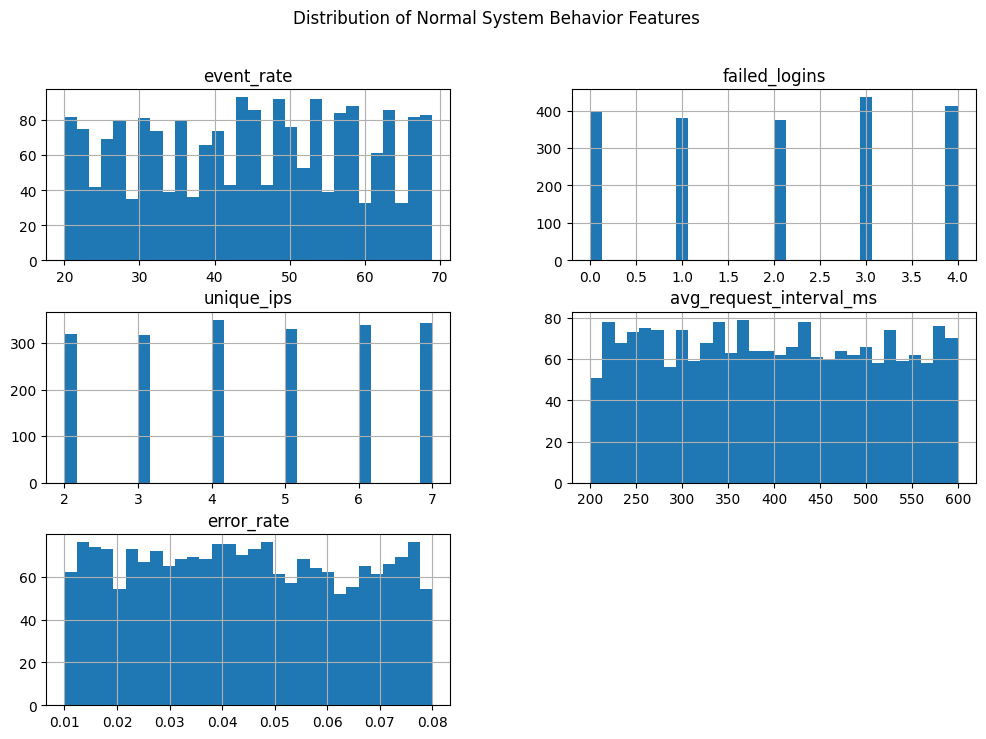

In [4]:
import matplotlib.pyplot as plt

train_normal_df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution of Normal System Behavior Features")
plt.show()


In [5]:
train_normal_df.to_csv("train_normal.csv", index=False)


## Task 3: Synthetic Anomaly Dataset

This dataset simulates **attack-like abnormal behavior**
such as brute-force login attempts, DDoS/flooding,
and API abuse patterns.

This dataset is **NOT used for training**.
It is used only for testing and demonstration.


In [6]:
import numpy as np
import pandas as pd

np.random.seed(99)

N_ANOMALIES = 400  # 300–500 is ideal

# Attack-like behavior ranges
event_rate = np.random.randint(120, 250, N_ANOMALIES)
failed_logins = np.random.randint(15, 60, N_ANOMALIES)
unique_ips = np.random.randint(15, 40, N_ANOMALIES)
avg_request_interval_ms = np.random.uniform(50, 120, N_ANOMALIES)
error_rate = np.random.uniform(0.2, 0.6, N_ANOMALIES)

# Create DataFrame
test_anomalies_df = pd.DataFrame({
    "event_rate": event_rate,
    "failed_logins": failed_logins,
    "unique_ips": unique_ips,
    "avg_request_interval_ms": avg_request_interval_ms,
    "error_rate": error_rate
})

test_anomalies_df.head()


,event_rate,failed_logins,unique_ips,avg_request_interval_ms,error_rate
0,249,30,24,102.110012,0.232542
1,155,24,34,54.490152,0.495787
2,188,52,19,64.859655,0.309437
3,249,40,27,89.365844,0.429881
4,155,37,39,104.968366,0.433363


In [7]:
test_anomalies_df.describe()


,event_rate,failed_logins,unique_ips,avg_request_interval_ms,error_rate
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,185.835000,37.597500,26.587500,85.661129,0.397444
std,36.690711,12.792757,7.558782,20.290101,0.116614
min,120.000000,15.000000,15.000000,50.001239,0.200048
25%,155.000000,26.000000,20.000000,67.679215,0.298542
50%,187.000000,39.000000,26.000000,86.721311,0.408222
75%,216.250000,49.000000,33.000000,104.286789,0.489487
max,249.000000,59.000000,39.000000,119.603213,0.599967


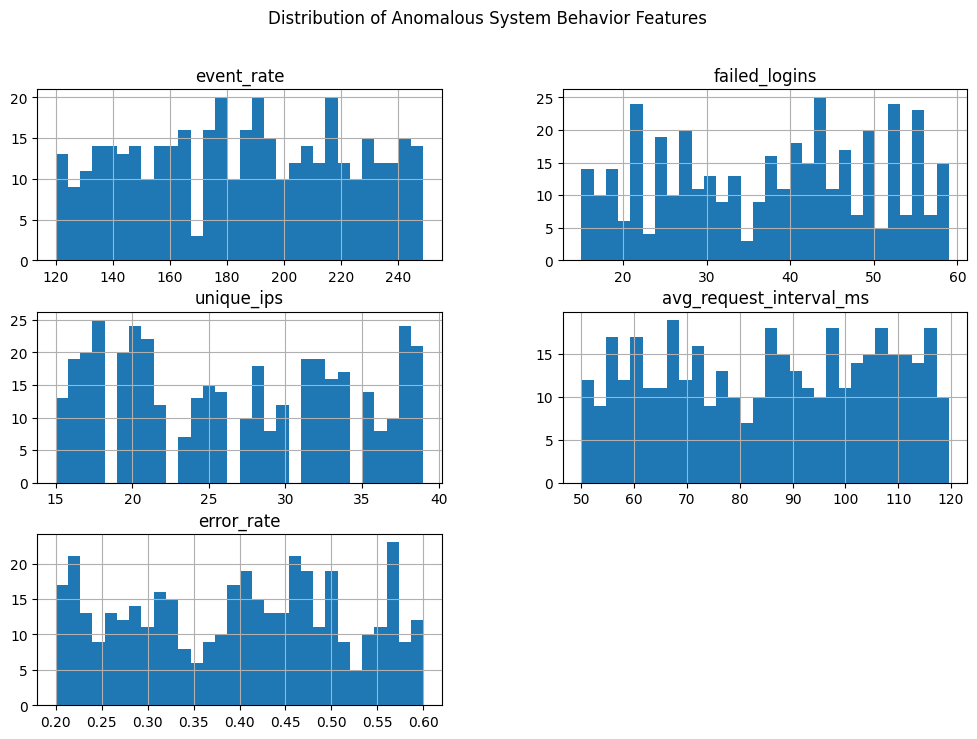

In [8]:
import matplotlib.pyplot as plt

test_anomalies_df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution of Anomalous System Behavior Features")
plt.show()


In [9]:
test_anomalies_df.to_csv("test_anomalies.csv", index=False)


Step 4: Load Training Dataset

In [10]:
import pandas as pd

train_df = pd.read_csv("train_normal.csv")
train_df.head()


,event_rate,failed_logins,unique_ips,avg_request_interval_ms,error_rate
0,58,4,4,523.969768,0.035671
1,48,2,4,433.252088,0.017406
2,34,2,6,492.088687,0.053974
3,62,0,4,345.928988,0.018496
4,27,0,5,456.386211,0.079015


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df)


In [12]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(
    n_estimators=100,
    contamination=0.07,   # expected anomaly ratio
    random_state=42
)

iforest.fit(X_train_scaled)


IsolationForest(contamination=0.07, random_state=42)

In [13]:
import joblib

joblib.dump(iforest, "iforest_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [14]:
# Check predictions on training data (should be mostly normal)
preds = iforest.predict(X_train_scaled)

# Isolation Forest: 1 = normal, -1 = anomaly
anomaly_ratio = (preds == -1).sum() / len(preds)
anomaly_ratio


np.float64(0.07)

Step-5:

In [15]:
import pandas as pd
import joblib

# Load datasets
normal_df = pd.read_csv("train_normal.csv")
anomaly_df = pd.read_csv("test_anomalies.csv")

# Load model and scaler
iforest = joblib.load("iforest_model.pkl")
scaler = joblib.load("scaler.pkl")


In [16]:
X_normal_scaled = scaler.transform(normal_df)
X_anomaly_scaled = scaler.transform(anomaly_df)


In [17]:
# Predictions
normal_preds = iforest.predict(X_normal_scaled)
anomaly_preds = iforest.predict(X_anomaly_scaled)

# Isolation Forest: 1 = normal, -1 = anomaly
normal_anomaly_rate = (normal_preds == -1).sum() / len(normal_preds)
anomaly_detection_rate = (anomaly_preds == -1).sum() / len(anomaly_preds)

normal_anomaly_rate, anomaly_detection_rate


(np.float64(0.07), np.float64(1.0))

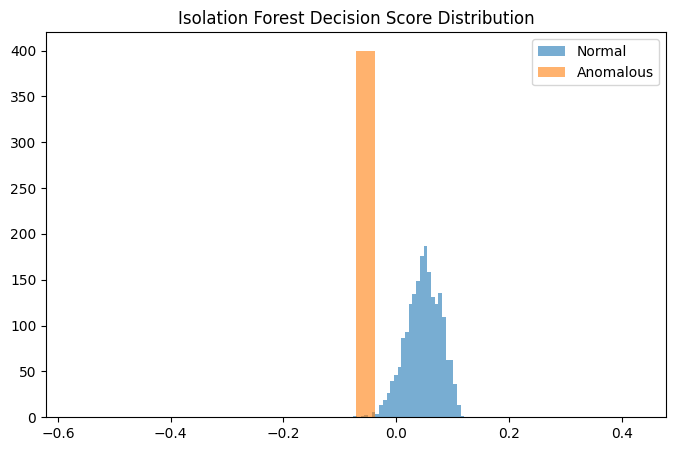

In [18]:
import matplotlib.pyplot as plt

normal_scores = iforest.decision_function(X_normal_scaled)
anomaly_scores = iforest.decision_function(X_anomaly_scaled)

plt.figure(figsize=(8,5))
plt.hist(normal_scores, bins=30, alpha=0.6, label="Normal")
plt.hist(anomaly_scores, bins=30, alpha=0.6, label="Anomalous")
plt.legend()
plt.title("Isolation Forest Decision Score Distribution")
plt.show()


In [19]:
# Pick one normal and one anomalous example
sample_normal = normal_df.iloc[0:1]
sample_anomaly = anomaly_df.iloc[0:1]

sample_normal_scaled = scaler.transform(sample_normal)
sample_anomaly_scaled = scaler.transform(sample_anomaly)

iforest.predict(sample_normal_scaled), iforest.predict(sample_anomaly_scaled)


(array([1]), array([-1]))